# Import Libarary

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/Project4/')
!pwd

/content/drive/MyDrive/Project4


In [4]:
!pip install arabic-reshaper
!pip install python-bidi

In [5]:
import os
import re
import string
import numpy as np
import pandas as pd

import arabic_reshaper
import arabic_reshaper
from bidi.algorithm import get_display

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import  Counter

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Read Dataset

In [6]:
data = pd.read_csv('process_data/new_dataset.csv', low_memory=False)

In [7]:
df = data.copy()

In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101645 entries, 0 to 101644
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   poem_id     101645 non-null  int64 
 1   poet_name   101645 non-null  object
 2   poem_title  101645 non-null  object
 3   poem_text   101645 non-null  object
 4   era         101645 non-null  object
 5   country     38215 non-null   object
 6   poem_style  58020 non-null   object
dtypes: int64(1), object(6)
memory usage: 5.4+ MB


In [9]:
df.head()

,poem_id,poet_name,poem_title,poem_text,era,country,poem_style
0,21,بدر شاكر السياب,أنشودة المطر,عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...,العصر الحديث,العراق,فصحى
1,65546,بدر شاكر السياب,أقداح و أحلام,انا لا ازال و في يدي قدحي ياليل اين تفرق الشر...,العصر الحديث,العراق,فصحى
2,65561,بدر شاكر السياب,هوى واحد !,علي مقلتيك ارتشفت النجوم وعانقت امالي الايبة ...,العصر الحديث,العراق,فصحى
3,65554,بدر شاكر السياب,أساطير,اساطير من حشرجات الزمان نسيج اليد البالية رواه...,العصر الحديث,العراق,فصحى
4,65550,بدر شاكر السياب,اللقاء الأخير,والتف حولك ساعداي ومال جيدك في اشتهاء كالزهرة ...,العصر الحديث,العراق,فصحى


In [10]:
df.shape

(101645, 7)

## 4.	Categorize the poetry entries based on genre.

## 5.	Obtain some statistics from the dataset.
    o	how many verses do we have?
    o	how many verses according to genre?
    o	How many poets do we have?
    o	How many verses per poet?
    o	for which era does the verse belong?
    o	What is the most common word?
    o	How many words within each verse?

In [11]:
#for reshape arabic text befor visualization
def add_arabic_Reshaper(text):
    return  get_display(arabic_reshaper.reshape(text))

### how many verses do we have?

In [12]:
df.shape

(101645, 7)

###  how many verses according to genre?

In [13]:
groupby_poem_style = df.groupby('poem_style')
groupby_poem_style.first()

,poem_id,poet_name,poem_title,poem_text,era,country
poem_style,,,,,,
عامي,70027,عبدالرحمن العشماوي,أحمد ياسين,هم اكسبوك من السباق رهانا فربحت انت وادركوا ا...,العصر الحديث,السعودية
فصحى,21,بدر شاكر السياب,أنشودة المطر,عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...,العصر الحديث,العراق


In [14]:
groupby_poem_style_count  = groupby_poem_style['poem_title'].count()
groupby_poem_style_count

poem_style
عامي      127
فصحى    57893
Name: poem_title, dtype: int64

In [15]:
res1 = {get_display(arabic_reshaper.reshape(k)): v for k,v in groupby_poem_style_count.items()}
#res1
df_res1= pd.DataFrame(res1.items(), columns=['poem_style', 'count'])
df_res1

,poem_style,count
0,ﻲﻣﺎﻋ,127
1,ﻰﺤﺼﻓ,57893


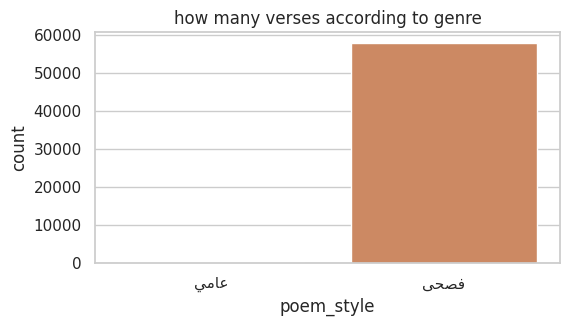

In [16]:
plt.figure(figsize=(6,3))

ax = sns.set(style="whitegrid")
ax = sns.barplot(x="poem_style", y="count" ,data=df_res1)
ax.set(xlabel='poem_style', ylabel='count', title='how many verses according to genre')

plt.savefig("images/how many verses according to genre.pdf")


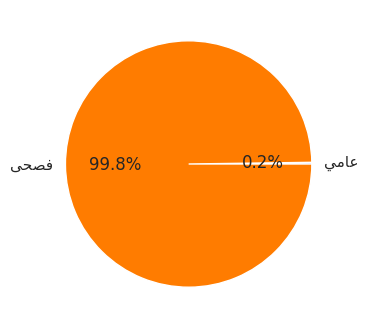

In [17]:
plt.figure(figsize=(8,4))
df_res1= pd.DataFrame(res1.items(), columns=['poem_style', 'count'])

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(df_res1['count'], labels = df_res1['poem_style'], colors = colors, autopct='%.1f%%')
plt.show()

#plt.savefig("images/how many verses according to genre.pdf")

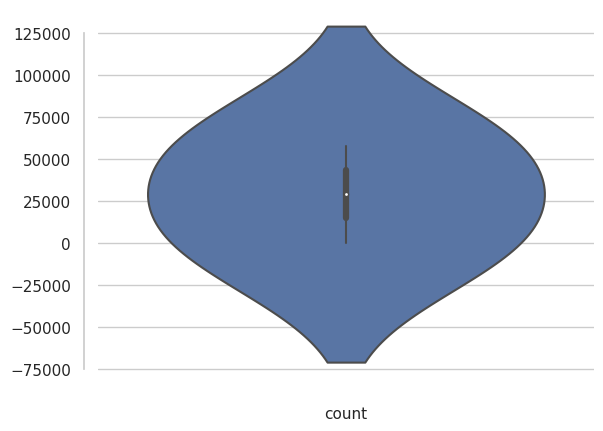

In [18]:
f, ax = plt.subplots()
sns.violinplot(data=df_res1)
sns.despine(offset=10, trim=True);

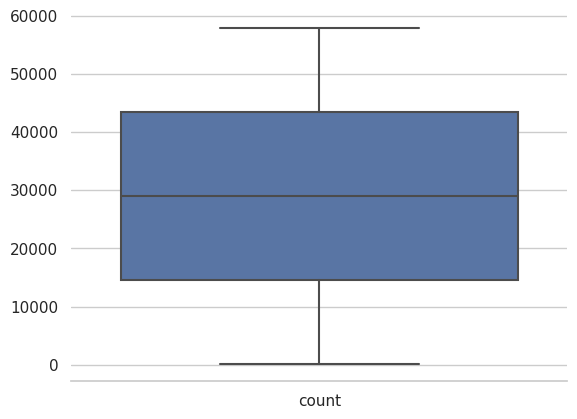

In [19]:
sns.set_style("whitegrid")
sns.boxplot(data=df_res1, palette="deep")
sns.despine(left=True)

###  How many poets do we have?

In [20]:
len(df.poet_name.unique())

1076

In [21]:
# Select unique values from the species column
print(df['poet_name'].unique().tolist())

['بدر شاكر السياب', 'نزار قباني', 'أمل دنقل', 'فاروق جويدة', 'أولاد أحمد', 'عبدالوهاب البياتي', 'غازي القصيبي', 'عمر أبو ريشة', 'عبدالرحمن العشماوي', 'إيليا أبو ماضي', 'نازك الملائكة', 'سعدي يوسف', 'توفيق زياد', 'غادة السمان', 'يحيى السماوي', 'علي أحمد باكثير', 'عمرو بن كلثوم', 'أبو البقاء الرندي', 'محمد الفيتوري', 'عبدالله الفيصل', 'قاسم حداد', 'عبدالوهاب زاهدة', 'سعود الصاعدي', 'محمد سعيد الحبوبي', 'علي جعفر العلاق', 'عدنان الصائغ', 'عبدالحميد الصائح', 'مصطفى جمال الدين', 'عبدالله الفيفي', 'أحمد مطر', 'محمود مفلح', 'عبد الرحمن بارود', 'عبدالله السفياني', 'صلاح عبدالصبور', 'يزيد بن معاوية', 'بلند الحيدري', 'تركي عامر', 'طلعت سقيرق', 'إبراهيم ناجي', 'أسعد الجبوري', 'موسى حوامدة', 'نايف الجهني', 'جابر قميحة', 'أحمد عبدالمعطي حجازي', 'فاروق شوشة', 'طاهر زمخشري', 'المتنبي', 'أبوالعلاء المعري', 'الفرزدق', 'البحتري', 'إبراهيم نصر الله', 'محمد زيدان', 'محمود أمين', 'وديع سعادة', 'إبراهيم طوقان', 'علي محمود طه', 'ناصيف اليازجي', 'فدوى طوقان', 'أحمد دحبور', 'معين بسيسو', 'خليل حاوي', 'محمد الق

###  How many verses per poet?

In [22]:
#https://www.kaggle.com/code/ozkanozturk/pandas-groupby-with-details
# https://sparkbyexamples.com/pandas/pandas-groupby-count-examples/
#https://pandas.pydata.org/docs/user_guide/visualization.html

In [23]:
groupby_poet_name = df.groupby('poet_name')

In [24]:
groupby_poet_name.first()

,poem_id,poem_title,poem_text,era,country,poem_style
poet_name,,,,,,
عبد الله الطيب,65221,بين الرياء والحياء,كلما لاح برقها خفق القل ب وجاشت من الحنين الع...,العصر الحديث,السودان,فصحى
أحمد بشير العيلة,78082,أوردة الباب المغلق,منفي حيث تقشر عن جلدك راءحة الارض وتبتل ملابسك...,العصر الحديث,فلسطين,فصحى
إبراهيم أحمد الوافي,7010,وعلى المقيمين خارجها مراعاة فارق التصويت,الرياض التي ترتدي جوربا لشتاء الثقيل وتنتعل ال...,العصر الحديث,السعودية,فصحى
جابر أبو حسين,70566,هودجُها وعيونُ الريح,-كون جديد كي تقدسك الشموس فانت بدء الضوء بدء ا...,العصر الحديث,سوريا,فصحى
طالب همّاش,74392,سماوات ليلى,لم يزل شاردا يتنادي مع الريح فوق اديم الصدي وا...,العصر الحديث,سوريا,فصحى
...,...,...,...,...,...,...
يوسف الخال,73009,الفجر الجديد,انا كل ما ادعي حملت صليبي معي املع ياسي واخنق ...,العصر الحديث,لبنان,فصحى
يوسف الخطيب,81678,يوسف,‏ بريءة منكم فلسطين التي تذبحون‏ و لحمها باق ع...,العصر الحديث,فلسطين,فصحى
يوسف الصائغ,63189,إجازة,شهداء عشرة نزلوا يوم اجازتهم لبصرة اربعة منهم ...,العصر الحديث,العراق,فصحى


In [25]:
# Finding the values contained in the "يوسف الصائغ" group
groupby_poet_name.get_group('يوسف الصائغ')

,poem_id,poet_name,poem_title,poem_text,era,country,poem_style
39279,63189,يوسف الصائغ,إجازة,شهداء عشرة نزلوا يوم اجازتهم لبصرة اربعة منهم ...,العصر الحديث,العراق,فصحى


In [26]:
groupby_poet_name_count  = groupby_poet_name['poem_title'].count()

In [27]:
res2 = {get_display(arabic_reshaper.reshape(k)): v for k,v in groupby_poet_name_count.items()}
#res2
df_res2= pd.DataFrame(res2.items(), columns=['poem_title', 'count'])
df_res2.head()

,poem_title,count
0,ﺐﻴﻄﻟﺍ ﷲ ﺪﺒﻋ,8
1,ﺔﻠﻴﻌﻟﺍ ﺮﻴﺸﺑ ﺪﻤﺣﺃ,15
2,ﻲﻓﺍﻮﻟﺍ ﺪﻤﺣﺃ ﻢﻴﻫﺍﺮﺑﺇ,25
3,ﻦﻴﺴﺣ ﻮﺑﺃ ﺮﺑﺎﺟ,32
4,ﺵﺎﻤﻫ ﺐﻟﺎﻃ,113


In [28]:
plt.figure(figsize=(15,128))

ax = sns.set(style="whitegrid")
ax = sns.barplot(x="count", y="poem_title", data=df_res2)
ax.set(xlabel='count verses', ylabel='poem title', title='How many verses per poet')

plt.savefig("images/How many verses per poet.pdf")

Output hidden; open in https://colab.research.google.com to view.

# Top 10 poet_name have  verses

In [36]:
df_poet_name_top = df.groupby("poet_name", sort=False).count()
df_poet_name_top

,poem_id,poem_title,poem_text,era,country,poem_style
poet_name,,,,,,
بدر شاكر السياب,194,194,194,194,194,193
نزار قباني,660,660,660,660,660,605
أمل دنقل,46,46,46,46,46,45
فاروق جويدة,160,160,160,160,160,158
أولاد أحمد,6,6,6,6,6,6
...,...,...,...,...,...,...
الصرصري,65,65,65,65,0,0
تميم الفاطمي,564,564,564,564,0,0
ابن الزقاق,151,151,151,151,0,0


In [37]:
df_poet_name_top = df.groupby("poet_name", sort=True)['poem_title'].count().reset_index()
df_poet_name_top

,poet_name,poem_title
0,عبد الله الطيب,8
1,أحمد بشير العيلة,15
2,إبراهيم أحمد الوافي,25
3,جابر أبو حسين,32
4,طالب همّاش,113
...,...,...
1071,يوسف الخال,29
1072,يوسف الخطيب,3
1073,يوسف الصائغ,1
1074,يوسف النبهاني,90


In [38]:
df_poet_name_top = df.groupby("poet_name", sort=True)['poem_title'].count().rename('count_verses').reset_index()
df_poet_name_top

,poet_name,count_verses
0,عبد الله الطيب,8
1,أحمد بشير العيلة,15
2,إبراهيم أحمد الوافي,25
3,جابر أبو حسين,32
4,طالب همّاش,113
...,...,...
1071,يوسف الخال,29
1072,يوسف الخطيب,3
1073,يوسف الصائغ,1
1074,يوسف النبهاني,90


In [39]:
df_poet_name_top = df.groupby("poet_name", sort=True)['poem_title'].count() \
                                                    .rename('count_verses') \
                                                    .reset_index() \
                                                    .sort_values(['count_verses'], ascending=False). \
head(10)
df_poet_name_top

,poet_name,count_verses
200,ابن الرومي,2300
291,ابن نباته المصري,1726
35,أبو العلاء المعري,1609
81,أبوالعلاء المعري,1593
290,ابن نباتة المصري,1534
748,عبد الغني النابلسي,1353
217,ابن الوردي,1228
707,صفي الدين الحلي,1177
545,جبران خليل جبران,1165
212,ابن المعتز,1114


In [40]:
type(df_poet_name_top)

pandas.core.frame.DataFrame

In [41]:
df_poet_name_top["poet_name_reshape"]  = df_poet_name_top.poet_name.apply(lambda x: add_arabic_Reshaper(x))

[Text(0.5, 0, 'count verses'),
 Text(0, 0.5, 'category'),
 Text(0.5, 1.0, 'Top 10 poet_name have verses')]

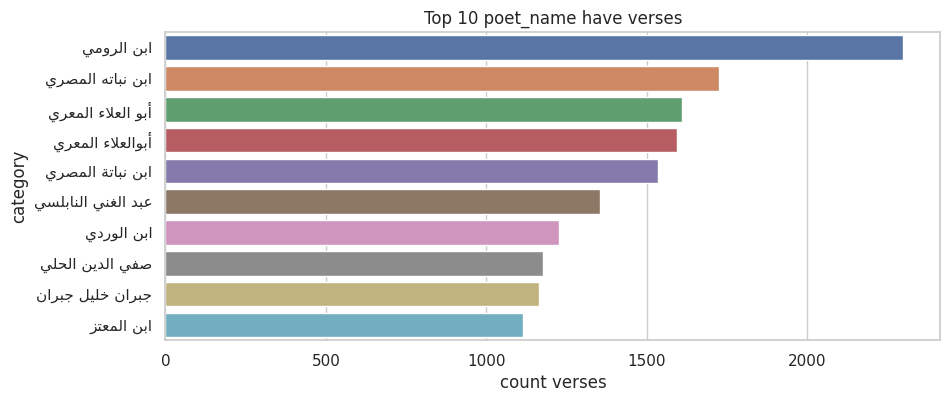

In [42]:
plt.figure(figsize=(10,4))

ax = sns.set(style="whitegrid")
ax = sns.barplot(x="count_verses", y="poet_name_reshape", data=df_poet_name_top)

ax.set(xlabel='count verses', ylabel='category', title='Top 10 poet_name have verses')


# Low 10 poet_name have  verses

In [44]:
df_poet_name_low = df.groupby("poet_name", sort=True)['poem_title'].count() \
                                                    .rename('count_verses') \
                                                    .reset_index() \
                                                    .sort_values(['count_verses'], ascending=True) \
                                                    .head(10)
df_poet_name_low

,poet_name,count_verses
537,ثعلبة بن عامر,1
321,الأشعث بن عابس,1
322,الأصمعي,1
324,الأعرج المري,1
327,الأعور بن عمرو الازدي,1
339,البسوس بنت منقذ التميمية,1
345,الجحاف الفزاري,1
348,الجندل الفزاري,1
349,الجوزاء بنت عروة البصرية,1
350,الجيداء بنت زاهر الزبيدية,1


In [45]:
df_poet_name_low["poet_name_reshape"]  = df_poet_name_low.poet_name.apply(lambda x: add_arabic_Reshaper(x))

[Text(0.5, 0, 'count verses'),
 Text(0, 0.5, 'category'),
 Text(0.5, 1.0, 'Low 10 poet name have verses')]

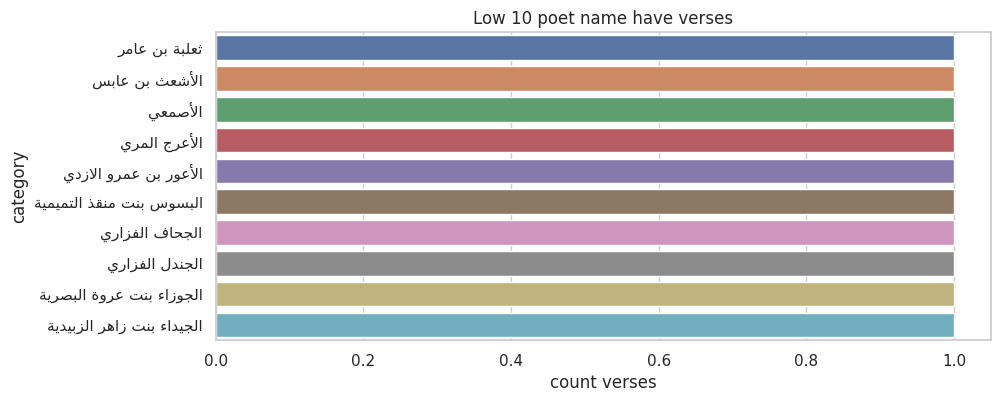

In [46]:
plt.figure(figsize=(10,4))

ax = sns.set(style="whitegrid")
ax = sns.barplot(x="count_verses", y="poet_name_reshape", data=df_poet_name_low)
ax.set(xlabel='count verses', ylabel='category', title='Low 10 poet name have verses')


###  for which era does the verse belong?

In [69]:
# Select unique values from the species column
df['era'].unique()

array(['العصر الحديث', 'العصر الجاهلي', 'العصر الأندلسي',
       'العصر الإسلامي', 'العصر العباسي', 'العصر الايوبي',
       'العصر العثماني', 'عصر المخضرمون', 'العصر الاموي',
       'العصر المملوكي'], dtype=object)

In [70]:
groupby_era = df.groupby('era')

In [71]:
groupby_era.first()

,poem_id,poet_name,poem_title,poem_text,country,poem_style,word_count
era,,,,,,,
العصر الأندلسي,718,أبو البقاء الرندي,ألثام شف,الثام شف عن ورد ند ام غمام ضحكت عن برد ام علي...,None,فصحى,115
العصر الإسلامي,64997,يزيد بن معاوية,ألاَ فَامْلَ لِي كَاسَاتِ خَمْـرٍ وَغَنِّنِـي,الا فامل لي كاسات خمر وغني بذكر سليمي والرباب...,None,فصحى,39
العصر الاموي,38508,أبو الأخيل العجلي,ألا يا اسلمي ذات الدماليج والعقدِ,أَلا يا اِسلَمِي ذاتَ الدَماليجِ وَالعِقدِ\nوَ...,None,None,150
العصر الايوبي,25789,بلبل الغرام الحاجري,أيها الشيخ دعوة من محب,أيها الشيخُ دعوةً من مُحبٍّ\nوخليل خال من التن...,None,None,19
العصر الجاهلي,671,عمرو بن كلثوم,أَلاَ هُبِّي بِصَحْنِكِ فَاصْبَحِيْنَا ( معلقة ),الا هبي بصحنك فاصبحينا ولا تبقي خمور الاندرين...,None,فصحى,868
العصر الحديث,21,بدر شاكر السياب,أنشودة المطر,عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...,العراق,فصحى,509
العصر العباسي,5430,المتنبي,عذل العواذل حول قلبي التائه,عذل العواذل حول قلبي التاءه وهوي الاحبة منه ف...,None,فصحى,68
العصر العثماني,31858,أبو البحر الخطي,يا من نأت بهم الديار فأصبحوا,يا من نأت بهمُ الديار فأصبحوا\nمستوطنينُ على ا...,None,None,140
العصر المملوكي,46060,الشاب الظريف,ظمئت إلى ماء الشباب ولم يزل,ظَمِئتُ إِلى ماءِ الشَبابِ وَلَم يَزَل\nيَغورُ...,None,None,21


In [72]:
groupby_era.get_group('العصر الجاهلي')

,poem_id,poet_name,poem_title,poem_text,era,country,poem_style,word_count
2116,671,عمرو بن كلثوم,أَلاَ هُبِّي بِصَحْنِكِ فَاصْبَحِيْنَا ( معلقة ),الا هبي بصحنك فاصبحينا ولا تبقي خمور الاندرين...,العصر الجاهلي,NaN,فصحى,868
2117,672,عمرو بن كلثوم,أأجمع صحبتي,اجمع صحبتي سحر ارتحالا ولم اشعر بين منك هالا ...,العصر الجاهلي,NaN,فصحى,80
2118,673,عمرو بن كلثوم,ألا من مبلغ,الا من مبلغ عمرو بن هند فما رعيت ذمامة من رعي...,العصر الجاهلي,NaN,فصحى,73
2119,674,عمرو بن كلثوم,إن نسركم غدا,اعمرو بن قيس ان نسركم غدا واب الي اهل الاصارم...,العصر الجاهلي,NaN,فصحى,67
11221,17326,أبو طالب,تَطاولَ ليلي بهمٍّ وَصِبْ,تطاول ليلي بهم وصب ودمع كسح السقاء السرب لعب ...,العصر الجاهلي,NaN,فصحى,160
...,...,...,...,...,...,...,...,...
70661,15456,عبيد بن الأبرص,أبلغ جذاما ولخما إن عرضت بهم,أَبلِغ جُذاماً وَلَخماً إِن عَرَضتَ بِهِم\nوَا...,العصر الجاهلي,NaN,NaN,20
70662,15457,عبيد بن الأبرص,وقد باتت عليه مها رماح,وَقَد باتَت عَلَيهِ مَها رُماحٍ\nحَواسِرَ ما ت...,العصر الجاهلي,NaN,NaN,10
70663,15458,عبيد بن الأبرص,يا ذا المخوفنا بقت,يا ذا المُخَوِّفَنا بِقَت\nلِ أَبيهِ إِذلالاً ...,العصر الجاهلي,NaN,NaN,188
70664,15459,عبيد بن الأبرص,تغيرت الديار بذي الدفين,تَغَيَّرَتِ الدِيارُ بِذي الدَفينِ\nفَأَودِيَة...,العصر الجاهلي,NaN,NaN,160


In [73]:
groupby_era_count  = groupby_era['poem_title'].count()
#roupby_era_count

In [74]:
res3 = {get_display(arabic_reshaper.reshape(k)): v for k,v in groupby_era_count.items()}
#res3
df_res3= pd.DataFrame(res3.items(), columns=['era', 'count'])
df_res3

,era,count
0,ﻲﺴﻟﺪﻧﻷﺍ ﺮﺼﻌﻟﺍ,8728
1,ﻲﻣﻼﺳﻹﺍ ﺮﺼﻌﻟﺍ,3902
2,ﻱﻮﻣﻻﺍ ﺮﺼﻌﻟﺍ,3091
3,ﻲﺑﻮﻳﻻﺍ ﺮﺼﻌﻟﺍ,5442
4,ﻲﻠﻫﺎﺠﻟﺍ ﺮﺼﻌﻟﺍ,3038
5,ﺚﻳﺪﺤﻟﺍ ﺮﺼﻌﻟﺍ,38215
6,ﻲﺳﺎﺒﻌﻟﺍ ﺮﺼﻌﻟﺍ,26882
7,ﻲﻧﺎﻤﺜﻌﻟﺍ ﺮﺼﻌﻟﺍ,3615
8,ﻲﻛﻮﻠﻤﻤﻟﺍ ﺮﺼﻌﻟﺍ,7110
9,ﻥﻮﻣﺮﻀﺨﻤﻟﺍ ﺮﺼﻋ,1622


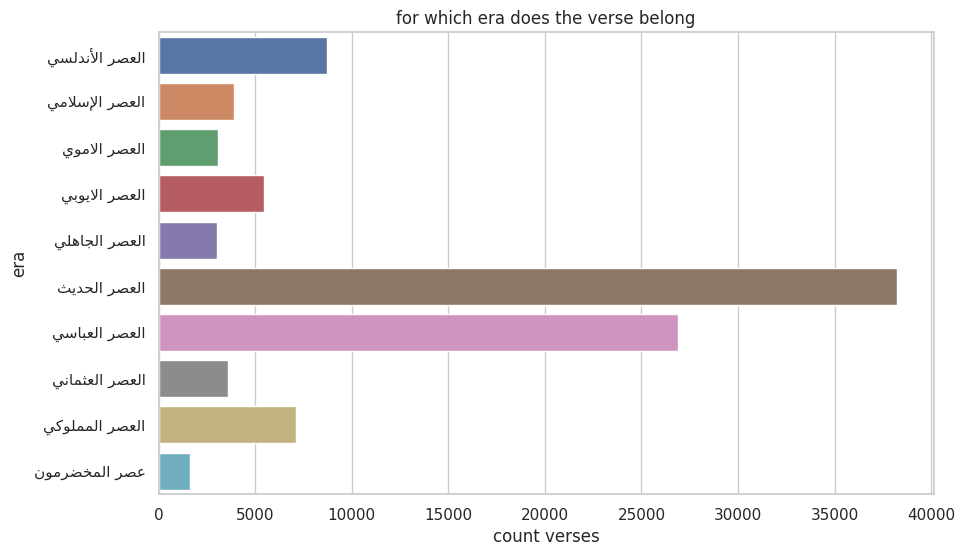

In [75]:
plt.figure(figsize=(10,6))

ax = sns.set(style="whitegrid")
ax = sns.barplot(x="count", y="era", data=df_res3)
ax.set(xlabel='count verses', ylabel='era', title='for which era does the verse belong')
plt.savefig("images/for which era does the verse belong.pdf")


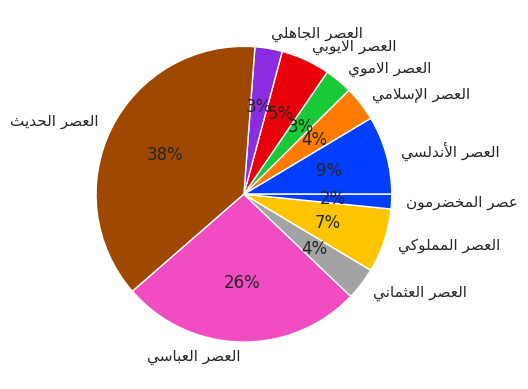

In [76]:
#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:9]

#create pie chart
plt.pie(df_res3['count'], labels = df_res3['era'], colors = colors, autopct='%.0f%%')
plt.show()

###   What is the most common word?

In [55]:
# Code Snippet for Top Non-Stopwords Barchart
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('arabic'))
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    counter=Counter(corpus)
    most=counter.most_common()
    word_list, count_list=[], []
    for word,count in most[:40]:
        if (word not in stop):
            word_list.append(get_display(arabic_reshaper.reshape(word)))
            count_list.append(count)

    return word_list,count_list

word_list,count_list =  plot_top_non_stopwords_barchart(df['poem_text'])
word_list,count_list

(['ﻲﻠﻋ', 'ﻥﺍ', 'ﻲﻟﺍ', 'ﺍﺫﺍ', 'ﻦﻣ', 'ﻭﺍ', 'ﻻﺍ', 'ﺪﻗﻭ', 'ﻪﻟﺍ', 'ﻲﺘﺣ', 'ﺎﻧﺍ'],
 [87532, 78006, 42504, 41446, 29483, 27677, 26714, 20077, 19810, 19180, 16214])

In [56]:
len (word_list) , len (count_list)

(11, 11)

In [57]:
data = {
    'word_list':word_list,
    'count_list':count_list
}
df_most_common_word= pd.DataFrame(data)
df_most_common_word.head(10)

,word_list,count_list
0,ﻲﻠﻋ,87532
1,ﻥﺍ,78006
2,ﻲﻟﺍ,42504
3,ﺍﺫﺍ,41446
4,ﻦﻣ,29483
5,ﻭﺍ,27677
6,ﻻﺍ,26714
7,ﺪﻗﻭ,20077
8,ﻪﻟﺍ,19810
9,ﻲﺘﺣ,19180


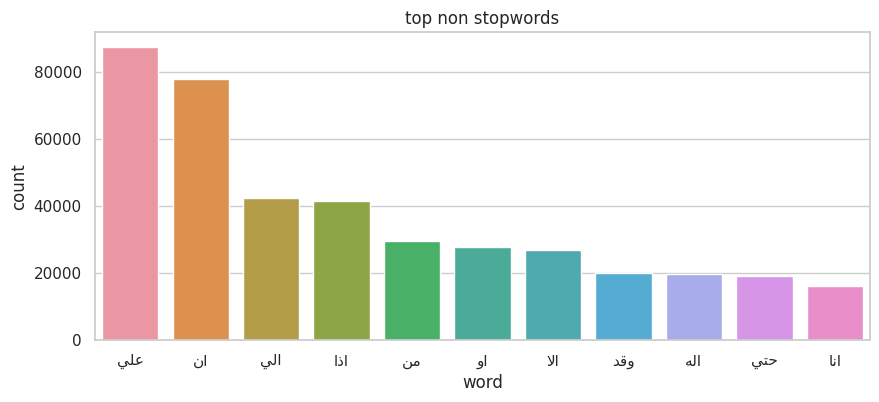

In [58]:
plt.figure(figsize=(10,4))
ax = sns.set(style="whitegrid")
ax = sns.barplot(x=df_most_common_word.word_list,y=df_most_common_word.count_list)
ax.set(xlabel='word', ylabel='count', title='top non stopwords')
plt.savefig("images/top_non_stopwords.pdf")

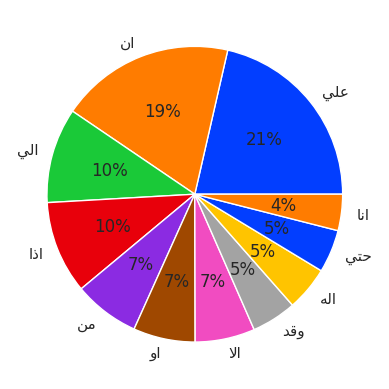

In [59]:
#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:9]

#create pie chart
plt.pie(count_list, labels = word_list, colors = colors, autopct='%.0f%%')
plt.show()

### How many words within each verse?

In [60]:
df['word_count'] = df.poem_text.str.split().str.len()

In [78]:
df_word_count = df.sort_values(['word_count'], ascending=False).head(10)

In [79]:
df.head()

,poem_id,poet_name,poem_title,poem_text,era,country,poem_style,word_count
0,21,بدر شاكر السياب,أنشودة المطر,عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...,العصر الحديث,العراق,فصحى,509
1,65546,بدر شاكر السياب,أقداح و أحلام,انا لا ازال و في يدي قدحي ياليل اين تفرق الشر...,العصر الحديث,العراق,فصحى,660
2,65561,بدر شاكر السياب,هوى واحد !,علي مقلتيك ارتشفت النجوم وعانقت امالي الايبة ...,العصر الحديث,العراق,فصحى,264
3,65554,بدر شاكر السياب,أساطير,اساطير من حشرجات الزمان نسيج اليد البالية رواه...,العصر الحديث,العراق,فصحى,222
4,65550,بدر شاكر السياب,اللقاء الأخير,والتف حولك ساعداي ومال جيدك في اشتهاء كالزهرة ...,العصر الحديث,العراق,فصحى,264


In [82]:
#for reshape arabic text befor visualization
df_word_count["poem_title_reshaper"]  = df_word_count.poem_title.apply(lambda x: add_arabic_Reshaper(x))

In [83]:
df_word_count.head()

,poem_id,poet_name,poem_title,poem_text,era,country,poem_style,word_count,poem_title_reshaper
14770,61992,ابن الرومي,خصيمُ الليالي والغواني مُظلَّم,خصيم اليالي والغواني مظلم وعهد اليالي والغوان...,العصر العباسي,NaN,فصحى,12951,ﻢﻠﻈﻣ ﻲﻧﺍﻮﻐﻟﺍﻭ ﻲﻟﺎﻴﻠﻟﺍ ﻢﻴﺼﺧ
64126,7271,يوسف النبهاني,نورك الكل والورى أجزاء,نورُكَ الكُلُّ وَالوَرى أَجزاءُ\nيا نَبِيّاً م...,العصر الحديث,فلسطين,NaN,9258,ﺀﺍﺰﺟﺃ ﻯﺭﻮﻟﺍﻭ ﻞﻜﻟﺍ ﻙﺭﻮﻧ
13265,60486,ابن الرومي,دعِ اللومَ إن اللوم عون النوائِب,دع الوم ان الوم عون النواءب ولا تجاوز فيه حد ...,العصر العباسي,NaN,فصحى,9111,ﺐﺋﺍﻮﻨﻟﺍ ﻥﻮﻋ ﻡﻮﻠﻟﺍ ﻥﺇ ﻡﻮﻠﻟﺍ ﻉﺩ
14760,61982,ابن الرومي,م طل دمع هريق في الأطلالص بعد إقوائها من الحُل...,م طل دمع هريق في الاطلالص بعد اقواءها من الحل...,العصر العباسي,NaN,فصحى,8989,ﻝﻼﺤﻟﺍ ﻦﻣ ﺎﻬﺋﺍﻮﻗﺇ ﺪﻌﺑ ﺺﻟﻼﻃﻷﺍ ﻲﻓ ﻖﻳﺮﻫ ﻊﻣﺩ ﻞﻃ ﻡ
13533,60754,ابن الرومي,م أبَيْنَ ضُلوعي جمرة تتوقدص على ما مضى أَمْ ح...,م ابين ضلوعي جمرة توقدص علي ما مضي ام حسرة تج...,العصر العباسي,NaN,فصحى,8787,ﺩﺪﺠﺘﺗ ﺓﺮﺴﺣ ﻡﺃ ﻰﻀﻣ ﺎﻣ ﻰﻠﻋ ﺹﺪﻗﻮﺘﺗ ﺓﺮﻤﺟ ﻲﻋﻮﻠﺿ ﻦ...


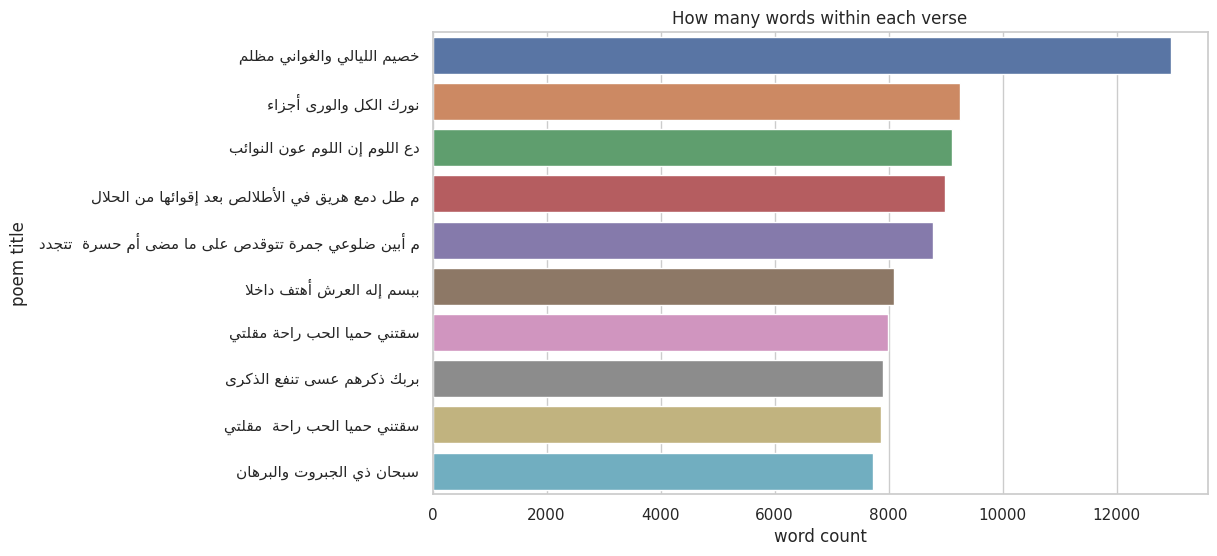

In [84]:
plt.figure(figsize=(10,6))
ax = sns.set(style="whitegrid")
#ax = sns.barplot(x="word_count", y=["poet_name", "poem_title_reshaper"] , data=df_word_count)
ax = sns.barplot(x="word_count", y="poem_title_reshaper" , data=df_word_count)
ax.set(xlabel='word count', ylabel='poem title', title='How many words within each verse')

plt.savefig("images/How many words within each verse.pdf")


# Generating Word Cloud

In [85]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = set(stopwords.words('arabic'))
print( len (stopwords))
#print (stopwords)

701


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
#stopwords = set(STOPWORDS)
# iterate through the csv file
for val in df.poem_text[:20]:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = get_display(arabic_reshaper.reshape(tokens[i].lower()))

    comment_words += " ".join(tokens)+" "


In [87]:
comment_words

'ﻙﺎﻨﻴﻋ ﺎﺘﺑﺎﻏ ﻞﻴﺨﻧ ﺔﻋﺎﺳ ﺮﺤﺴﻟﺍ ﻭﺍ ﻥﺎﺘﻓﺮﺷ ﺡﺍﺭ ﻱﺎﻨﻳ ﺎﻤﻬﻨﻋ ﺮﻤﻘﻟﺍ ﻙﺎﻨﻴﻋ ﻦﻴﺣ ﻥﺎﻤﺴﺒﺗ ﻕﺭﻮﺗ ﻡﻭﺮﻜﻟﺍ ﺺﻗﺮﺗﻭ ﺀﺍﻮﺿﻻﺍ ﺭﺎﻤﻗﻻﺎﻛ ﻲﻓ ﺮﻬﻧ ﻪﺟﺮﻳ ﻑﺍﺬﺠﻤﻟﺍ ﺎﻨﻫﻭ ﺔﻋﺎﺳ ﺮﺤﺴﻟﺍ ﺎﻤﻧﺎﻛ ﺾﺒﻨﺗ ﻲﻓ ﺎﻤﻬﻳﺭﻮﻏ ﻡﻮﺠﻨﻟﺍ ﻥﺎﻗﺮﻐﺗﻭ ﻲﻓ ﺏﺎﺒﺿ ﻦﻣ ﻲﺳﺍ ﻒﻴﻔﺷ ﺮﺤﺒﻟﺎﻛ ﺡﺮﺳ ﻦﻳﺪﻴﻟﺍ ﻪﻗﻮﻓ ﺀﺎﺴﻤﻟﺍ ﺀﻑﺩ ﺀﺎﺘﺸﻟﺍ ﻪﻴﻓ ﺔﺷﺎﻌﺗﺭﺍﻭ ﻒﻳﺮﺨﻟﺍ ﺕﻮﻤﻟﺍﻭ ﺩﻼﻴﻤﻟﺍﻭ ﻡﻼﻈﻟﺍﻭ ﺀﺎﻴﻀﻟﺍﻭ ﻖﻴﻔﺘﺴﺘﻓ ﺀﻞﻣ ﻲﺣﻭﺭ ﺔﺸﻋﺭ ﺀﺎﻜﺒﻟﺍ ﺓﻮﺸﻧﻭ ﺔﻴﺸﺣﻭ ﻖﻧﺎﻌﺗ ﺀﺎﻤﺴﻟﺍ ﺓﻮﺸﻨﻛ ﻞﻔﻄﻟﺍ ﺍﺫﺍ ﻑﺎﺧ ﻦﻣ ﺮﻤﻘﻟﺍ ﻥﺎﻛ ﺱﺍﻮﻗﺍ ﺏﺎﺤﺴﻟﺍ ﺏﺮﺸﺗ ﻡﻮﻴﻐﻟﺍ ﺓﺮﻄﻗﻭ ﺓﺮﻄﻘﻓ ﺏﻭﺬﺗ ﻲﻓ ﺮﻄﻤﻟﺍ ﺮﻛﺮﻛﻭ ﻝﺎﻔﻃﻻﺍ ﻲﻓ ﺵﺀﺍﺮﻋ ﻡﻭﺮﻜﻟﺍ ﺖﻏﺪﻏﺩﻭ ﺖﻤﺻ ﺮﻴﻓﺎﺼﻌﻟﺍ ﻲﻠﻋ ﺮﺠﺸﻟﺍ ﺓﺩﻮﺸﻧﺍ ﺮﻄﻤﻟﺍ ﺮﻄﻣ ﺮﻄﻣ ﺮﻄﻣ ﺏﺀﺎﺜﺗ ﺀﺎﺴﻤﻟﺍ ﻡﻮﻴﻐﻟﺍﻭ ﺎﻣ ﻝﺍﺰﺗ ﺢﺴﺗ ﺎﻣ ﺢﺴﺗ ﻦﻣ ﺎﻬﻋﻮﻣﺩ ﻝﺎﻘﺜﻟﺍ ﻥﺎﻛ ﻼﻔﻃ ﺕﺎﺑ ﻱﺬﻬﻳ ﻞﺒﻗ ﻥﺍ ﻡﺎﻨﻳ ﻥﺎﺑ ﻪﻣﺍ – ﻲﺘﻟﺍ ﻕﺎﻓﺍ ﺬﻨﻣ ﻡﺎﻋ ﻢﻠﻓ ﺎﻫﺪﺠﻳ ﻢﺛ ﻦﻴﺣ ﺞﻟ ﻲﻓ ﻝﺍﺀﺲﻟﺍ ﺍﻮﻟﺎﻗ ﻪﻟ ﺪﻌﺑ" ﺪﻏ ﺩﻮﻌﺗ " ﻻ ﺪﺑ ﻥﺍ ﺩﻮﻌﺗ ﻥﺍﻭ ﺲﻣﺎﻬﺗ ﻕﺎﻓﺮﻟﺍ ﺎﻬﻧﺍ ﻙﺎﻨﻫ ﻲﻓ ﺐﻧﺎﺟ ﻞﺘﻟﺍ ﻡﺎﻨﺗ ﺔﻣﻮﻧ ﺩﻮﺤﻟﺍ ﻒﺴﺗ ﻦﻣ ﺎﻬﺑﺍﺮﺗ ﺏﺮﺸﺗﻭ ﺮﻄﻤﻟﺍ ﻥﺎﻛ ﺍﺩﺎﻴﺻ ﺎﻨﻳﺰﺣ ﻊﻤﺠﻳ ﻙﺎﺒﺸﻟﺍ ﻦﻌﻠﻳﻭ ﻩﺎﻴﻤﻟﺍ ﺭﺪﻘﻟﺍﻭ ﺮﺜﻨﻳﻭ ﺀﺎﻨﻐﻟﺍ ﺚﻴﺣ ﻞﻓﺎﻳ ﺮﻤﻘﻟﺍ ﺮﻄﻣ ﺮﻄﻣ ﻦﻴﻤﻠﻌﺗﺍ ﻱﺍ ﻥﺰﺣ ﺚﻌﺒﻳ ﺮﻄﻤﻟﺍ ﻒﻴﻛﻭ ﺞﺸﻨﺗ ﺐﻳﺭﺍﺰﻤﻟﺍ ﺍﺫﺍ ﺮﻤﻬﻧﺍ ﻒﻴﻛﻭ ﺮﻌﺸﻳ ﺪﻴﺣﻮﻟﺍ ﻪﻴﻓ ﻉﺎﻴﻀﻟﺎﺑ ﻼﺑ ﺀﺎﻬﺘﻧﺍ – ﻡﺪﻟﺎﻛ ﻕﺍﺮﻤﻟﺍ ﻉﺎﻴﺠﻟﺎﻛ ﺐﺤﻟﺎﻛ ﻝﺎﻔﻃﻻﺎﻛ ﻲﺗﻮﻤﻟﺎ

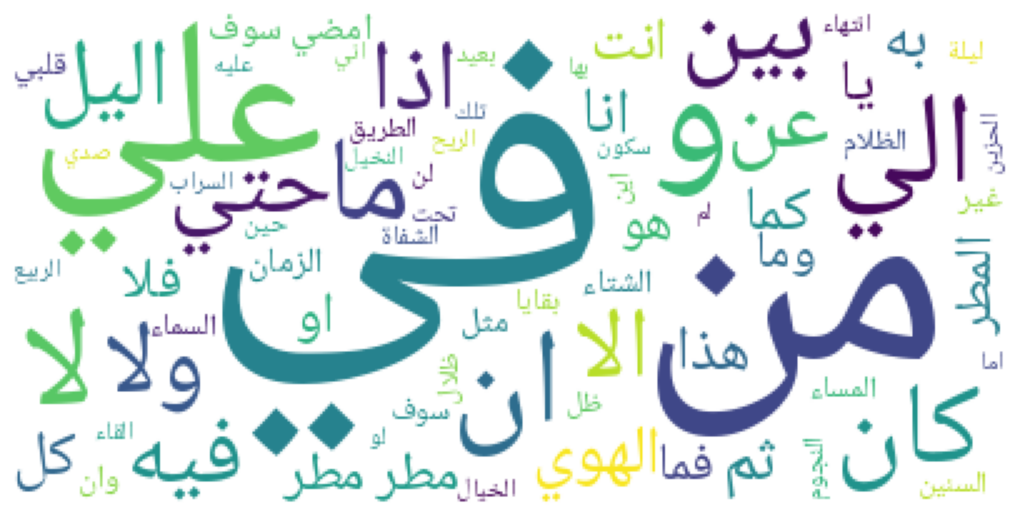

In [88]:
# Make text readable for a non-Arabic library like wordcloud
text = arabic_reshaper.reshape(comment_words)
text = get_display(text)

# Generate a word cloud image
wordcloud = WordCloud(font_path='fonts/NotoNaskhArabic-Regular.ttf',
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(text)

# Export to an image
#wordcloud.to_file("arabic_example.png")

# plot the WordCloud image
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
